In [1]:
import sys
sys.path.append('..')
import sfp
import pyrtools as pt
import seaborn as sns
import numpy as np
import pandas as pd
import sympy
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display

%load_ext autoreload
%autoreload 2

Failed to import duecredit due to No module named 'duecredit'


In [2]:
stimuli = np.load('../data/stimuli/task-sfprescaled_stimuli.npy')
stim_df = pd.read_csv('../data/stimuli/task-sfprescaled_stim_description.csv')

In [155]:
stim_idx = 0
stim = stimuli[stim_idx]
w_r = stim_df.iloc[stim_idx].w_r
w_a = stim_df.iloc[stim_idx].w_a
dx, dy, _, _ = sfp.stimuli.create_sf_maps_cpp(stim.shape[0], w_r=w_r, w_a=w_a)

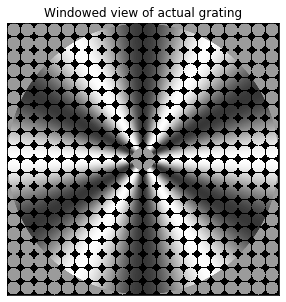

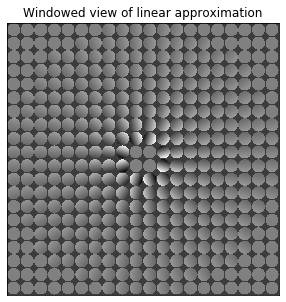

In [156]:
sfp.plotting.plot_grating_approximation(stim, dx, dy, 20, w_r=w_r, w_a=w_a);

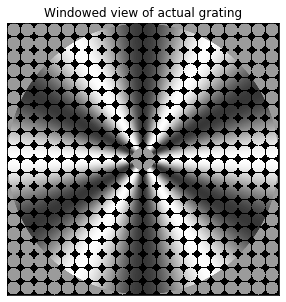

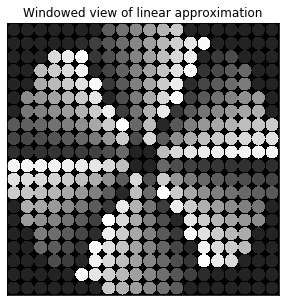

In [147]:
sfp.plotting.plot_grating_approximation(stim, dx, dy, 20, w_r=w_r, w_a=w_a);

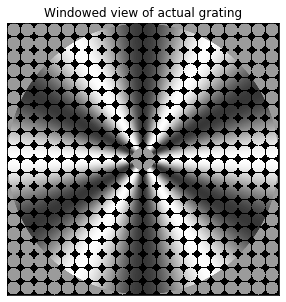

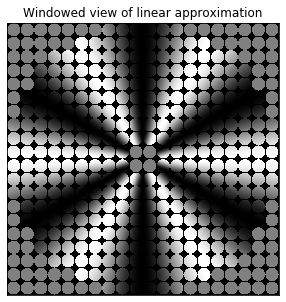

In [133]:
sfp.plotting.plot_grating_approximation(stim, dx, dy, 20, w_r=w_r, w_a=w_a);

In [5]:
model = sfp.model.LogGaussianDonut()

In [34]:
import itertools

pix_diam = 256
deg_diam = 24
deg_to_pix = deg_diam / pix_diam
pref_period = np.empty((pix_diam, pix_diam))
origin = (pix_diam+1)/2
for x, y in itertools.product(range(256), range(256)):
    e = np.sqrt((x-origin)**2 + (y-origin)**2)
    a = np.mod(np.arctan2(y-origin, x-origin), 2*np.pi)
    pref_period[x, y] = model.preferred_period(e, a, 0)
pref_sf = 1./pref_period
#pref_sf = sfp.utils.mask_array_like_grating(stim, pref_sf)

In [162]:
dx, dy, mag, direc = sfp.stimuli.create_sf_maps_cpd(pix_diam, deg_diam, w_r=0, w_a=6, stim_type='logpolar')
mag = sfp.utils.mask_array_like_grating(stim, mag)
direc = sfp.utils.mask_array_like_grating(stim, direc)
dx = sfp.utils.mask_array_like_grating(stim, dx)
dy = sfp.utils.mask_array_like_grating(stim, dy)

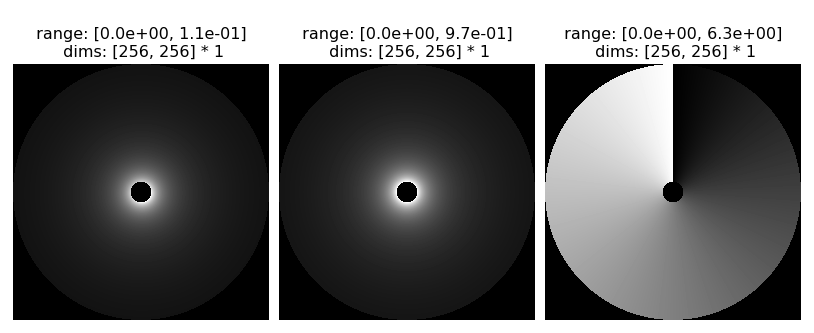

In [163]:
pt.imshow([sfp.utils.mask_array_like_grating(stim, pref_sf), mag, direc]);

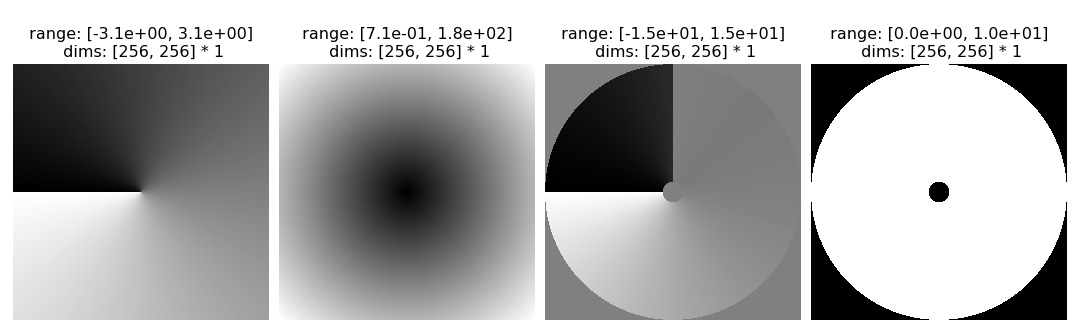

In [167]:
r = sfp.stimuli.mkR(256)
theta = sfp.stimuli.mkAngle(256)
pt.imshow([theta, r, theta*direc, mag*r]);

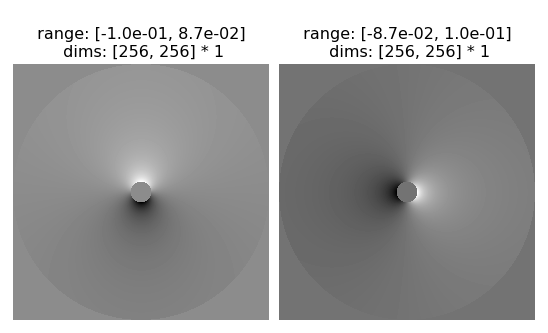

In [153]:
pref_dx = pref_sf * np.cos(direc)
pref_dx = sfp.utils.mask_array_like_grating(stim, pref_dx)
pref_dy = pref_sf * np.sin(direc)
pref_dy = sfp.utils.mask_array_like_grating(stim, pref_dy)
pt.imshow([pref_dx, pref_dy]);

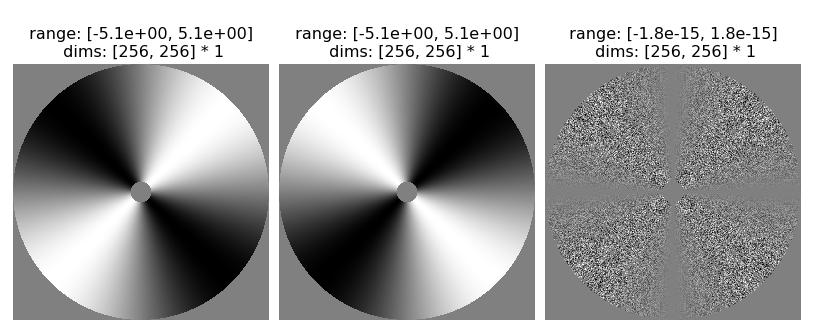

In [64]:
xramp, yramp = np.meshgrid(np.arange(1, pix_diam+1) - origin, np.arange(1, pix_diam+1) - origin)
pt.imshow([xramp*dx, yramp*dy, xramp*dx+ yramp*dy]);

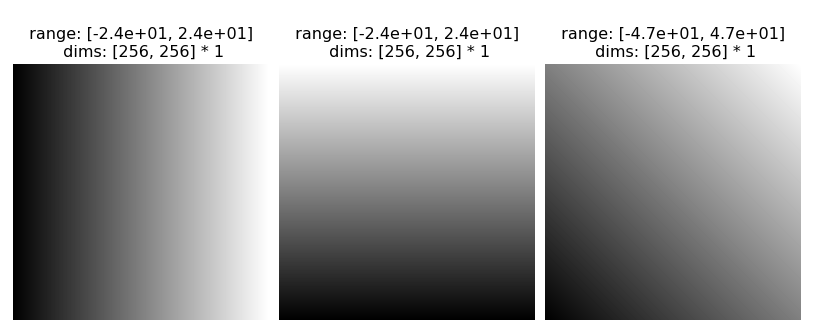

In [65]:
pt.imshow([xramp * dx[100, 100], yramp*dy[100,100], xramp * dx[100, 100] + yramp*dy[100,100]]);

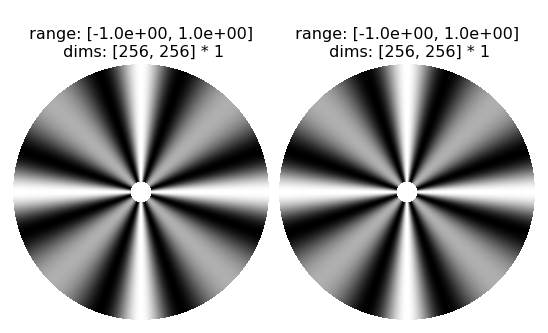

In [69]:
pt.imshow([np.cos(xramp*dx), np.cos(yramp*dy)]);

# 1d?

Try to reason through this in 1d

In [106]:
pref_sf_1d = mag[128, 138:]

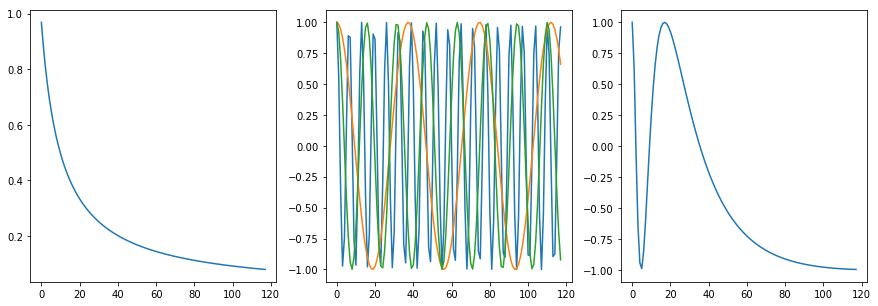

In [107]:
x = np.arange(len(pref_sf_1d))
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].plot(pref_sf_1d)
axes[1].plot(np.cos(pref_sf_1d[0]*x))
axes[1].plot(np.cos(pref_sf_1d[50]*x))
axes[1].plot(np.cos(pref_sf_1d[15]*x))
axes[2].plot(np.cos(pref_sf_1d*x))

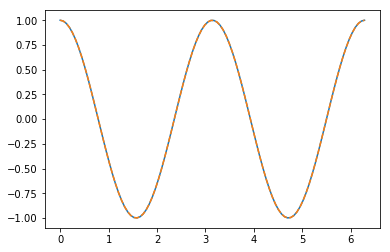

In [111]:
x = np.linspace(0, 2*np.pi, 100)
plt.plot(x, np.cos(2*x))
plt.plot(x, (np.exp(2*x*1j)+np.exp(2*x*-1j))/2, '--')

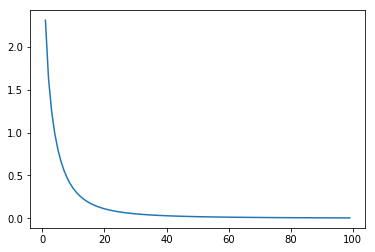

In [85]:
def dx_to_integrate(x, w_r, y):
    return (w_r*x) / (x**2+y**2)

integrated_dx = lambda w_r, y: quad(dx_to_integrate, 0, 10, args=(w_r, y), limit=100)

ys = range(1, 100)
vals = []
for y in ys:
    vals.append(integrated_dx(1, y)[0])
plt.plot(ys, vals)

In [123]:
dxdy_to_integrate(10, 10, 1)

-0.005

In [116]:
def dx_to_integrate(x, w_r, y):
    return (w_r*x) / (x**2+y**2)
def dy_to_integrate(y, w_r, x):
    return (w_r*y) / ((x**2+y**2))
def dxdy_to_integrate(y, x, w_r):
    return (-2*x*w_r*y) / ((x**2+y**2)**2)

integrated_dx = lambda w_r, y: quad(dx_to_integrate, 0, 10, args=(w_r, y))
integrated_dy = lambda w_r, y: quad(dy_to_integrate, 0, y, args=(w_r, 10))
integrated_dxdy = lambda w_r, y: nquad(dxdy_to_integrate, [[0, y], [0, 10]], args=(w_r,))

In [ ]:
ys = range(1, 100)
vals = []
for y in ys:
    vals.append((integrated_dx(1, y)[0] + integrated_dy(1, y)[0] - integrated_dxdy(1, y)[0]))
plt.plot(ys, vals)

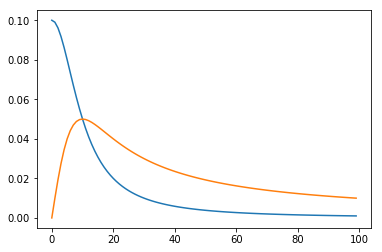

In [94]:
def dx_to_integrate(x, w_r, y):
    return (w_r*x) / ((x**2+y**2))
def dy_to_integrate(y, w_r, x):
    return (w_r*y) / ((x**2+y**2))

ys = range(100)
vals = []
for y in ys:
    vals.append((dx_to_integrate(10, 1, y), dy_to_integrate(y, 1, 10)))
plt.plot(ys, vals)

In [66]:
def orig_func(x, y, w_a, w_r, phi=0):
    lrad = np.log2(x**2+y**2)
    theta = np.arctan2(y, x)
    return ((w_r * np.log(2))/2) * lrad + w_a * theta + phi

In [68]:
import scipy.misc as misc

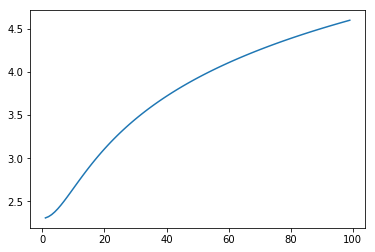

In [86]:
w_r = 1
w_a = 0
x = 10
ys = range(1,100)
vals = []
for y in ys:
    vals.append(orig_func(x, y, w_a, w_r))
plt.plot(ys, vals)

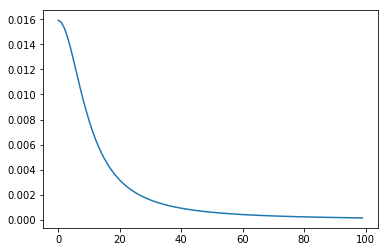

In [77]:
def dx_to_integrate(x, w_r, y):
    return (w_r*y) / (x**2+y**2)

integrated_dx = lambda w_r, y: quad(dx_to_integrate, 0, 10, args=(w_r, y))

ys = range(100)
vals = []
for y in ys:
    vals.append(sfp.stimuli._calc_sf_analytically(10, y, w_r=1, w_a=0)[0])
plt.plot(ys, vals)

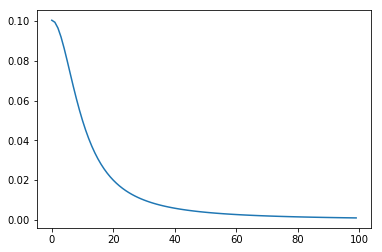

In [70]:
w_r = 1
w_a = 0
x = 10
ys = range(100)
vals = []
for y in ys:
    vals.append(misc.derivative(orig_func, 10, args=(y, w_a, w_r)))
plt.plot(ys, vals)

In [7]:
w_a = sympy.Symbol('w_a')
w_r = sympy.Symbol('w_r')
#r = sympy.Symbol('r')
#theta = sympy.Symbol('theta')
x = sympy.Symbol('x')
y = sympy.Symbol('y')
r = sympy.sqrt(x**2+y**2)
theta = sympy.atan2(y,x)

$\frac{\partial f}{\partial x}=\omega_x(x_0,y_0)=
\frac{y_0\omega_r+x_0\omega_a}{2\pi(x_0^2+y_0^2)}$


$\frac{\partial f}{\partial
  y}=\omega_y(x_0,y_0)=\frac{x_0\omega_r-y_0\omega_a}{2\pi(x_0^2+y_0^2)}$

Standard version:

In [101]:
dx = (w_r*y + w_a*x) / ((x**2+y**2))
dy = (w_r*x - w_a*y) / ((x**2+y**2))

dr = sympy.sqrt(sympy.factor(dx**2+dy**2))
dtheta = sympy.atan(dy/dx)
display(dr)
display(dtheta)

sqrt((w_a**2 + w_r**2)/(x**2 + y**2))

atan((-w_a*y + w_r*x)/(w_a*x + w_r*y))

with $w_r=0$

In [79]:
dx = (w_a*x) / ((x**2+y**2))
dy = (-w_a*y) / ((x**2+y**2))
dr = sympy.sqrt(sympy.factor(dx**2+dy**2))
dtheta = sympy.atan(dy/dx)
display(dr)
display(dtheta)

sqrt(w_a**2/(x**2 + y**2))

-atan(y/x)

with $w_a=0$

In [8]:
dx = (w_r*y) / ((x**2+y**2))
dy = (w_r*x) / ((x**2+y**2))
dr = sympy.sqrt(sympy.factor(dx**2+dy**2))
dtheta = sympy.atan(dy/dx)
display(dr)
display(dtheta)

sqrt(w_r**2/(x**2 + y**2))

atan(x/y)

In [125]:
dr*sympy.cos(dtheta)

sqrt(w_r**2/(x**2 + y**2))/sqrt(x**2/y**2 + 1)

In [130]:
dx.evalf(subs={w_r:1, x:10, y:20})

0.0400000000000000

In [129]:
(dr*sympy.cos(dtheta)).evalf(subs={w_r: 1, x: 10, y: 20})

0.0400000000000000